In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import math
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import tensorflow
import keras
from keras.models import Sequential, Model
from keras.layers import Dropout, Dense, Input
import itertools
from keras.losses import binary_crossentropy
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

### Importing the Dataset

In [86]:
df = pd.read_csv("UCI_Credit_Card.csv")
df=df.drop(columns='ID')
df = df.rename(columns = {'default.payment.next.month':'default_class'})
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_class
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Data Exploration and Data Cleaning

In [87]:
print(pd.DataFrame(df['default_class'].value_counts()))
print("\n",pd.DataFrame(df['SEX'].value_counts()))
print("\n",pd.DataFrame(df['EDUCATION'].value_counts()))
print("\n",pd.DataFrame(df['MARRIAGE'].value_counts()))

   default_class
0          23364
1           6636

      SEX
2  18112
1  11888

    EDUCATION
2      14030
1      10585
3       4917
5        280
4        123
6         51
0         14

    MARRIAGE
2     15964
1     13659
3       323
0        54


### Default Class type = 1 is only 22% of the entire dataset. It is a highly unbalanced dataset.

#### Education categories 4, 5, 6, 0 can be grouped under 'Other' category

In [88]:
df.loc[(df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0),'EDUCATION'] = 4
pd.DataFrame(df['EDUCATION'].value_counts())

,EDUCATION
2,14030
1,10585
3,4917
4,468


#### Marriage categories 3, 0 can be grouped under 'Other' category

In [89]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
pd.DataFrame(df['MARRIAGE'].value_counts())

,MARRIAGE
2,15964
1,13659
3,377


### Dummy Variables creation for categorical variables

In [90]:
df = pd.get_dummies(df, columns=['SEX', 'EDUCATION','MARRIAGE'])

### Feature Scaling

In [97]:
def feature_scaling(df_unscaled):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_unscaled)
    scaled_data = pd.DataFrame(scaled_data, columns = df_unscaled.columns)
    return(scaled_data)

### Train Test Split

In [179]:
x=df.loc[:,df.columns != 'default_class']
x.iloc[:,0:20]=feature_scaling(x.iloc[:,0:20])
y=df['default_class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

C:\Users\aashe\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [180]:
y_train.value_counts()

0    16364
1     4636
Name: default_class, dtype: int64

### Under sampling the Default Class 0

In [181]:
xy_train = pd.concat([X_train, y_train], axis=1)
not_default = xy_train[xy_train['default_class']==0]
default = xy_train[xy_train['default_class']==1]

default_undersampled_df = resample(not_default, replace=True, n_samples=7000, random_state=17) 
undersampled_df = pd.concat([default, default_undersampled_df])
print(undersampled_df['default_class'].value_counts())

X_train_undersampled = undersampled_df.loc[:,undersampled_df.columns != 'default_class']
y_train_undersampled = undersampled_df['default_class']
X_train_undersampled.head()

0    7000
1    4636
Name: default_class, dtype: int64


,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
8447,-0.751350,-1.029047,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.377734,-0.365381,...,0.004922,0,1,0,1,0,0,0,1,0
4535,0.481833,0.164303,0.904712,-1.558876,-1.532192,-1.521944,-1.530046,-1.486041,-0.695642,-0.690983,...,-0.293382,1,0,0,1,0,0,0,1,0
27198,-1.059646,-0.052670,0.904712,-0.723570,-0.696663,1.899436,0.234917,0.253137,-0.695642,-0.322415,...,-0.209004,1,0,0,1,0,0,1,0,0
15632,-0.597202,-1.137534,0.904712,-0.723570,-0.696663,-0.666599,-0.647565,1.992316,-0.695642,-0.679181,...,-0.261318,0,1,0,1,0,0,0,1,0
17697,-0.828424,0.598248,1.794564,0.111736,0.138865,1.899436,0.234917,0.253137,0.071429,0.090820,...,-0.180878,0,1,0,1,0,0,1,0,0


In [182]:
X_train = X_train_undersampled
y_train = y_train_undersampled

In [183]:
y_train.value_counts()

0    7000
1    4636
Name: default_class, dtype: int64

### Experimenting with combination of neurons and layers

In [189]:
initial_neurons = [15,22,29]
layers_combo = [2,3]
layer_neurons_df =pd.DataFrame()
for layer_no in layers_combo:
    neurons_combo = [p for p in itertools.product(initial_neurons, repeat=layer_no)]
    for neurons in neurons_combo:
        model = Sequential()
        for layer in range(1,layer_no+1):
            if (layer == 1):
                model.add(Dense(neurons[0], input_dim=29, activation='sigmoid'))
            else:
                model.add(Dense(neurons[layer-1],activation='sigmoid'))
        model.add(Dense(1, activation='sigmoid'))
        optimizer_value = keras.optimizers.Adam(learning_rate=0.005)
        model.compile(optimizer=optimizer_value, loss='binary_crossentropy')
        model.fit(X_train, y_train, batch_size = 200,epochs=100,verbose=0)
        pred = model.predict_classes(X_test)
        score = f1_score(y_test,pred)
        values = [score,layer_no,neurons]
        values = pd.DataFrame(values).T
        layer_neurons_df = pd.concat([layer_neurons_df,values])

layer_neurons_df.columns = ['F1 Score','Layer','Neurons']
top10 = layer_neurons_df.sort_values(by=['F1 Score'],ascending=False).head(10)
top10

,F1 Score,Layer,Neurons
0,0.528328,3,"(15, 22, 15)"
0,0.526803,3,"(22, 22, 29)"
0,0.524469,2,"(22, 22)"
0,0.523764,2,"(15, 29)"
0,0.520499,3,"(15, 15, 29)"
0,0.519939,2,"(15, 15)"
0,0.519769,3,"(22, 22, 15)"
0,0.519513,2,"(29, 29)"
0,0.51932,3,"(15, 29, 22)"
0,0.518914,3,"(22, 29, 22)"


### Plot for F1 Score Vs (Neurons and layers)

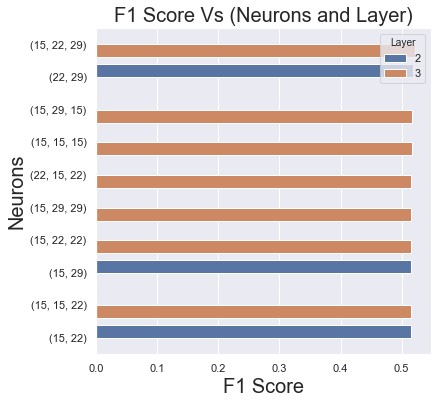

In [149]:
plt.figure(figsize=(6,6))
flatui = ["#9b59b6", "#3498db", "#95a5a6"]
sns.barplot(data=top10 ,x='F1 Score', y='Neurons',hue='Layer')
plt.title("F1 Score Vs (Neurons and Layer)",fontsize=20)
plt.xlabel("F1 Score",fontsize=20)
plt.ylabel("Neurons",fontsize=20)
plt.show()

### Experimenting with Epochs

In [186]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

epoch_list = [5,10,20,50,100,150,200,300,350,400]
y_train = pd.DataFrame(y_train)
epoch_df_validation = pd.DataFrame()
epoch_df_train = pd.DataFrame()

for epoch in epoch_list:
    scores_validation = []
    scores_train = []
    for train, test in kfold.split(X_train, y_train):
        train = train.tolist()
        test = test.tolist()
        
        model = Sequential()  ###Creating the model
        model.add(Dense(15, input_dim=29, activation='sigmoid'))    ###Adding layers
        model.add(Dense(22, activation='sigmoid'))
        model.add(Dense(29, activation='sigmoid'))
        model.add(Dense(1, activation='sigmoid'))
        optimizer_value = keras.optimizers.Adam(learning_rate=0.01)
        model.compile(loss='binary_crossentropy', optimizer=optimizer_value)
        
        # Fitting the model and getting the training scores
        model.fit(X_train.iloc[train,:], y_train.iloc[train,:], batch_size=200,epochs=epoch, verbose=0)
        
        pred_train = model.predict_classes(X_train.iloc[train,:])
        train_scores = f1_score(y_train.iloc[train,:],pred_train)
        scores_train.append(train_scores)
        # Evaluating the model
        pred_test = model.predict_classes(X_train.iloc[test,:])
        validation_scores = f1_score(y_train.iloc[test,:],pred_test)
        scores_validation.append(validation_scores)
    
    print(epoch,"Training F1 Score: " ,np.mean(scores_train),"Validation F1 Score: ",np.mean(scores_validation))
    
    validation_values = [epoch,np.mean(scores_validation)]
    validation_values = pd.DataFrame(validation_values).T
    epoch_df_validation = pd.concat([epoch_df_validation,validation_values])
    
    train_values = [epoch,np.mean(scores_train)]
    train_values = pd.DataFrame(train_values).T
    epoch_df_train = pd.concat([epoch_df_train,train_values])
    
epoch_df_validation.columns = ['Epoch','F1 Score']
epoch_df_train.columns = ['Epoch','F1 Score']


5 Training F1 Score:  0.6047160623473636 Validation F1 Score:  0.5986613836426324
10 Training F1 Score:  0.6123431864585042 Validation F1 Score:  0.6007445913032134
20 Training F1 Score:  0.6247461379101834 Validation F1 Score:  0.6082624324707133
50 Training F1 Score:  0.6578779216108753 Validation F1 Score:  0.6212707552819936
100 Training F1 Score:  0.6680417518763446 Validation F1 Score:  0.6154153334628765
150 Training F1 Score:  0.6806038033424885 Validation F1 Score:  0.6055458311894276
200 Training F1 Score:  0.6936129166859646 Validation F1 Score:  0.6143160798142258
300 Training F1 Score:  0.7192127229896558 Validation F1 Score:  0.6051753011871638
350 Training F1 Score:  0.7250634484850247 Validation F1 Score:  0.6068836638924153
400 Training F1 Score:  0.7333438218699918 Validation F1 Score:  0.6010049471947241


### Plot for Epochs and F1 Score

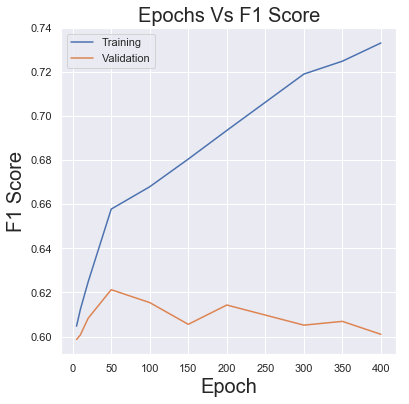

In [187]:

plt.figure(figsize=(6,6))
plt.plot(epoch_df_train['Epoch'],epoch_df_train['F1 Score'])
plt.plot(epoch_df_validation['Epoch'],epoch_df_validation['F1 Score'])
plt.title("Epochs Vs F1 Score",fontsize=20)
plt.xlabel("Epoch",fontsize=20)
plt.ylabel("F1 Score",fontsize=20)
plt.legend(['Training','Validation'])
plt.show()

### Experimenting with number of hidden layers

In [123]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
layers_list = [1,2,3,4,5]  ###Hidden Layers
y_train = pd.DataFrame(y_train)
df_layers_train = pd.DataFrame()
df_layers_validation = pd.DataFrame()

for layer in layers_list:
    model = Sequential()
    scores_validation = []
    scores_train = []
    for tmp in range(layer):
        if tmp == 0:
            model.add(Dense(15, input_dim=29,activation='sigmoid'))
        elif tmp == 1:
            model.add(Dense(22, activation='sigmoid'))
        elif tmp == 2:
            model.add(Dense(29, activation='sigmoid'))
        else:
            model.add(Dense(15, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    for train, test in kfold.split(X_train, y_train):
        train = train.tolist()
        test = test.tolist()
        optimizer_value = keras.optimizers.Adam(learning_rate=0.01)
        model.compile(loss='binary_crossentropy', optimizer=optimizer_value, metrics=['accuracy'])
        # Fit the model
        model.fit(X_train.iloc[train,:], y_train.iloc[train,:],batch_size = 200,epochs=50, verbose=0)
        # Getting the Training scores
        pred_train = model.predict_classes(X_train.iloc[train,:])
        train_scores = f1_score(y_train.iloc[train,:],pred_train)
        scores_train.append(train_scores)
        # Evaluating the model
        pred_test = model.predict_classes(X_train.iloc[test,:])
        validation_scores = f1_score(y_train.iloc[test,:],pred_test)
        scores_validation.append(validation_scores)
    
    print(layer,"Training F1 Score: " ,np.mean(scores_train),"Validation F1 Score: ",np.mean(scores_validation))
    
    validation_values = [layer,np.mean(scores_validation)]
    validation_values = pd.DataFrame(validation_values).T
    df_layers_validation = pd.concat([df_layers_validation,validation_values])
    
    
    train_values = [layer,np.mean(scores_train)]
    train_values = pd.DataFrame(train_values).T
    df_layers_train = pd.concat([df_layers_train,train_values])
    

    

1 Training F1 Score:  0.6610585900776231 Validation F1 Score:  0.6336701705704176
2 Training F1 Score:  0.6671835453364494 Validation F1 Score:  0.6364528788338139
3 Training F1 Score:  0.6866415192814731 Validation F1 Score:  0.6419308125526907
4 Training F1 Score:  0.692159035555844 Validation F1 Score:  0.6512581166801743
5 Training F1 Score:  0.6868854805035665 Validation F1 Score:  0.6534342733530256


### Plots for Scores Vs Layers

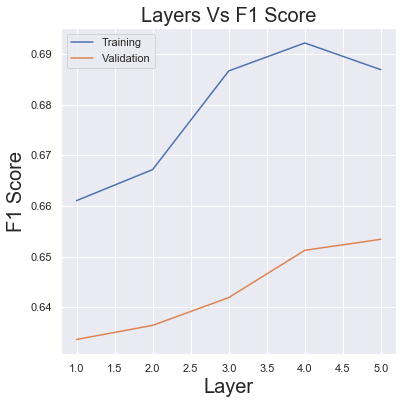

In [156]:
df_layers_train.columns = ['Layer','F1 Score']
df_layers_validation.columns = ['Layer','F1 Score']

plt.figure(figsize=(6,6))
plt.plot(df_layers_train['Layer'],df_layers_train['F1 Score'])
plt.plot(df_layers_validation['Layer'],df_layers_validation['F1 Score'])
plt.title("Layers Vs F1 Score",fontsize=20)
plt.xlabel("Layer",fontsize=20)
plt.ylabel("F1 Score",fontsize=20)
plt.legend(['Training','Validation'])
plt.show()

### Experimenting with Activation

In [126]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
y_train = pd.DataFrame(y_train)
df_activation_train = pd.DataFrame()
df_activation_validation = pd.DataFrame()
activation_list = ['sigmoid','relu','tanh']

for count in range(len(activation_list)):
    scores_train = []
    scores_validation = []
    model = Sequential()
    model.add(Dense(15, input_dim=29, activation=activation_list[count]))
    model.add(Dense(22, activation=activation_list[count]))
    model.add(Dense(29, activation=activation_list[count]))
    model.add(Dense(1, activation='sigmoid'))
    for train, test in kfold.split(X_train, y_train):
        train = train.tolist()
        test = test.tolist()
        
        optimizer_value = keras.optimizers.Adam(learning_rate=0.01)
        model.compile(loss='binary_crossentropy', optimizer=optimizer_value, metrics=['accuracy'])
        # Fit the model
        model.fit(X_train.iloc[train,:], y_train.iloc[train,:],batch_size = 200,epochs=50, verbose=0)
        # evaluate the model
        pred_train = model.predict_classes(X_train.iloc[train,:])
        train_scores = f1_score(y_train.iloc[train,:],pred_train)
        scores_train.append(train_scores)
        # Evaluating the model
        pred_test = model.predict_classes(X_train.iloc[test,:])
        validation_scores = f1_score(y_train.iloc[test,:],pred_test)
        scores_validation.append(validation_scores)
    
    print(activation_list[count],"Training F1 Score: " ,np.mean(scores_train),"Validation F1 Score: ",np.mean(scores_validation))
    
    validation_values = [activation_list[count],np.mean(scores_validation)]
    validation_values = pd.DataFrame(validation_values).T
    df_activation_validation = pd.concat([df_activation_validation,validation_values])
    
    
    train_values = [activation_list[count],np.mean(scores_train)]
    train_values = pd.DataFrame(train_values).T
    df_activation_train = pd.concat([df_activation_train,train_values])
    

sigmoid Training F1 Score:  0.6708105385764911 Validation F1 Score:  0.63767075770378
relu Training F1 Score:  0.7132450483481547 Validation F1 Score:  0.6526830103619743
tanh Training F1 Score:  0.749873217761867 Validation F1 Score:  0.6626542843021981


### Plot for F1 Score Vs Activation Functions

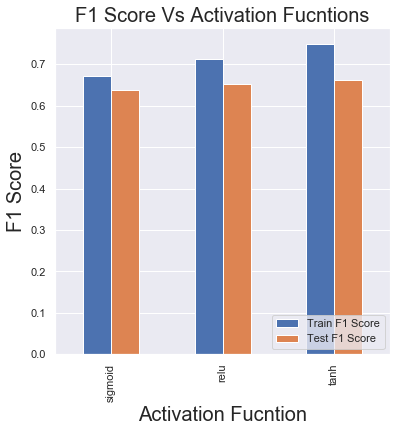

In [157]:
df_activation_train.columns = ['Activation','Train F1 Score']
df_activation_validation.columns = ['Activation','Test F1 Score']
df_merged = pd.merge(df_activation_train,df_activation_validation,how='inner',on='Activation')
df_merged = df_merged.set_index('Activation') 

df_merged.plot.bar(figsize=(6,6))
plt.legend(loc="lower right")
plt.title("F1 Score Vs Activation Fucntions",fontsize=20)
plt.ylabel("F1 Score",fontsize=20)
plt.xlabel("Activation Fucntion",fontsize=20)
plt.show()

### Model implementation with the Optimal Parameters

In [144]:
model = Sequential()
model.add(Dense(15, input_dim=29, activation='sigmoid'))
model.add(Dense(22, activation='sigmoid'))
model.add(Dense(29, activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
optimizer_value = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer_value)

model.fit(X_train, y_train,batch_size = 200,epochs=50, verbose=0)
train_scores = model.evaluate(X_train, y_train, verbose=0)

pred_test = model.predict_classes(X_test)
f1_score(y_test, pred_test)

0.5204991087344029

In [145]:
print(classification_report(y_test,pred_test))
pd.DataFrame(confusion_matrix(y_test,pred_test),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      7000
           1       0.53      0.51      0.52      2000

    accuracy                           0.79      9000
   macro avg       0.70      0.69      0.69      9000
weighted avg       0.79      0.79      0.79      9000



,Predicted 0,Predicted 1
Actual 0,6095,905
Actual 1,978,1022


### K-Nearest Neighbors

In [159]:
from imblearn.over_sampling import SMOTE
df_knn = df.iloc[:,:21]

x=df_knn.loc[:,df_knn.columns != 'default_class']
x.iloc[:,0:20]=feature_scaling(x.iloc[:,0:20])
y=df_knn['default_class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

C:\Users\aashe\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [160]:
y_train.value_counts()

0    16364
1     4636
Name: default_class, dtype: int64

### SMOTE Sampling

In [161]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [162]:
np.bincount(y_train)

array([16364, 16364], dtype=int64)

### Hyperparameter Tuning to find the Optimal Number of Neighbors

In [163]:
from sklearn.model_selection import cross_val_score

score_list = []
for neighbor in range(1,30):
    model = KNeighborsClassifier(n_neighbors=neighbor)
    scores = cross_val_score(model, X_train, y_train, cv=3,scoring= 'f1')
#     print(neighbor, scores.mean())
    score_list.append(scores.mean())
    
neighbor_accuracy_df = pd.DataFrame({'F1 Score':score_list}) 

### Plot for F1 Score Vs Neighbors

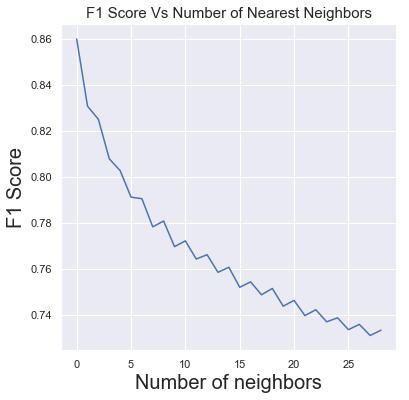

In [164]:
plt.figure(figsize=(6,6))
plt.plot(neighbor_accuracy_df)
plt.title("F1 Score Vs Number of Nearest Neighbors",fontsize=15)
plt.xlabel("Number of neighbors",fontsize=20)
plt.ylabel("F1 Score",fontsize=20)
plt.show()

### Hyperparameter Tuning to find the Best Distance Metric

In [82]:
from sklearn.model_selection import cross_val_score

# neighbors = [1,2,3,4,5,6,7,8]
distance_neighbor_df = pd.DataFrame()
distance_metrics_list = ['chebyshev','minkowski','manhattan']
for distance_metric in distance_metrics_list:
    for neighbor in range(1,6):
        model = KNeighborsClassifier(n_neighbors=neighbor,metric = distance_metric)
        scores = cross_val_score(model, X_train, y_train, cv=3,scoring='f1')
#     print(neighbor, scores.mean())                          
        values  =  [distance_metric,neighbor,scores.mean()]
        values = pd.DataFrame(values).T
        distance_neighbor_df = pd.concat([distance_neighbor_df,values])

distance_neighbor_df.columns = ['Distance Metric','Neighbor','Accuracy']
distance_neighbor_df['Neighbor'] = distance_neighbor_df['Neighbor'].astype(float)
distance_neighbor_df['Accuracy'] = distance_neighbor_df['Accuracy'].astype(float)

### F1 Score Vs (Distance Metric and Neighbors)

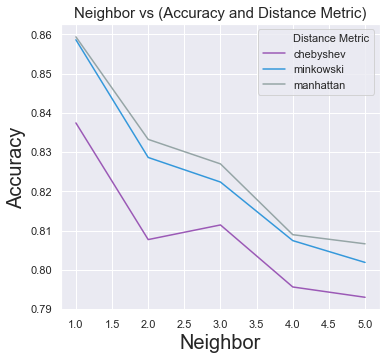

In [83]:
import seaborn as sns
flatui = ["#9b59b6", "#3498db", "#95a5a6"]
sns.set(rc={'figure.figsize':(5.7,5.27)})
sns.lineplot(data=distance_neighbor_df, x='Neighbor', y='Accuracy',hue='Distance Metric',palette=flatui)
plt.xlabel("Neighbor",fontsize=20)
plt.ylabel("F1 Score",fontsize=20)
plt.title("Neighbor vs (F1 Score and Distance Metric)",fontsize=15)
plt.show()

### Learning Curve with Train Size Vs F1 Score

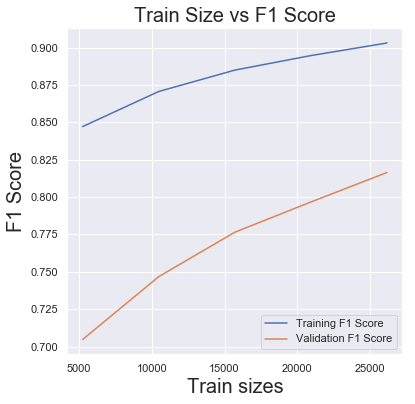

In [167]:
train_sizes, train_scores, valid_scores = learning_curve(KNeighborsClassifier(n_neighbors=3,metric = 'manhattan'), 
    X_train, y_train,train_sizes=[0.2,0.4,0.6,0.8,1],cv=5,random_state=1,shuffle=True)

train_mean = train_scores.mean(axis=1)
valid_mean = valid_scores.mean(axis=1)

plt.figure(figsize=(6,6))
plt.plot(train_sizes, train_mean, label = 'Training F1 Score')
plt.plot(train_sizes, valid_mean, label = 'Validation F1 Score')
plt.xlabel("Train sizes",fontsize=20)
plt.ylabel("F1 Score",fontsize=20)
plt.title("Train Size vs F1 Score",fontsize=20)
plt.legend(loc="lower right")
plt.show()

### Model Implementation with the Best Parameters

In [176]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
print(f1_score(y_train,pred_train))
f1_score(y_test,pred_test)

0.9127173542448006


0.44146246596655

In [177]:
print(classification_report(y_test,pred_test))
pd.DataFrame(confusion_matrix(y_test,pred_test),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

              precision    recall  f1-score   support

           0       0.85      0.71      0.78      7000
           1       0.36      0.57      0.44      2000

    accuracy                           0.68      9000
   macro avg       0.61      0.64      0.61      9000
weighted avg       0.74      0.68      0.70      9000



,Predicted 0,Predicted 1
Actual 0,4993,2007
Actual 1,865,1135
